# Exercise: Classification (Logistic Regression, KNN, Decision Tree)
Using the cancer data, predict the possibility of tumor severity, using the model :

    - Logistic Regression 
    - KNN
    - Decision Tree 

Data feature and target:  

    - Feature: 'texture_mean', 'concave points_mean', 
    - Target: 'diagnosis' 

Define which model is best to predict the cancer based on accuracy test?

- Drop missing data if needed.
- Compare the accuracy test on KNN with and without scaling (MinMaxScaler) 
- Keterangan feature: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

    - diagnosis (M = malignant, B = benign)
    - texture (standard deviation of gray-scale values)
    - concave points (number of concave portions of the contour)


__DATA__

In [315]:
import pandas as pd
import numpy as np

In [316]:
breastcancer = pd.read_csv('breast_cancer.csv')
breastcancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [317]:
breastcancer['severity'] = np.where(breastcancer['diagnosis'] == 'M', 1, 0)

In [318]:
breastcancer[['diagnosis', 'severity']][breastcancer['severity'] == 1]

,diagnosis,severity
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1
...,...,...
563,M,1
564,M,1
565,M,1
566,M,1


In [319]:
fitur = ['texture_mean', 'concave points_mean']
target = 'severity'

x = breastcancer[fitur]
y = breastcancer[target]

In [320]:
x.describe()

,texture_mean,concave points_mean
count,569.000000,569.000000
mean,19.289649,0.048919
std,4.301036,0.038803
min,9.710000,0.000000
25%,16.170000,0.020310
50%,18.840000,0.033500
75%,21.800000,0.074000
max,39.280000,0.201200


__Logistics Regression Modelling__

In [321]:
import statsmodels.api as sm

In [322]:
model = sm.Logit(y, sm.add_constant(x))
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.178682
         Iterations 9


In [323]:
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:               severity   No. Observations:                  569
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Oct 2022   Pseudo R-squ.:                  0.7294
Time:                        17:21:33   Log-Likelihood:                -101.67
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                9.586e-120
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -12.9422      1.391     -9.305      0.000     -15.668     -10.216
texture_mean            0.3288      0.050      6.584      0.000       0.231       0.427
concave points_m

Output :

1. LLR P-Value : 0.00....9586 (F-Test)
2. P-Value Coef :
    1. const : 0.000
    2. texture_mean : 0.000
    3. concave points_mean : 0.000
3. Coef : ( alpha = 0.05, take the score below 0.05)
    1. const : -12.9422
    2. texture_mean : -0.3288
    3. concave points_mean : -119.6902

In [324]:
breastcancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,severity
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1


Yang dimodelkan ada prediksi kemungkinan suatu tumor merupakan tumor ganas atau jinak
Output :

1. LLR P-Value : 0.00....9586 < 0.05 (tolak Ho). Artinya, minimal salah satu variable berpengaruh terhadap kekerasan dari suatu tumor
2. P-Value Coef :
    1. const : 0.000 < 0.05 (tolak Ho)
    2. texture_mean : 0.000
    3. concave points_mean : 0.000
3. Coef : ( alpha = 0.05, kita ambil nilai yg dibawah 0.05)
    1. const : -12.9422
    2. texture_mean : -0.3288
    3. concave points_mean : -119.6902

In [325]:
# Untuk mendapatkan nilai interpretasi Coef b1 dan b2
# 1. Nilai min max dari texture-mean
c = 20
a = 15
OR_texture_mean = np.exp(0.3288 * (c-a))
print (OR_texture_mean)

# 2. Nilai min max dari concave points_mean
d = 0.1
b = 0.05
OR_concave_points = np.exp(119.6902 * (d-b))
print(OR_concave_points)

5.175831486683224
397.2278319167215


__Multicollinearity__

In [326]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [327]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variable'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values, i) for i in range (x.shape[1])]

    return vif

In [328]:
calc_vif(x)

,variable,vif
0,texture_mean,2.836017
1,concave points_mean,2.836017


__Validasi__

In [329]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [330]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 2020
)

In [331]:
sm.Logit_train = sm.Logit(y_train, sm.add_constant(x_train))
result_train = sm.Logit_train.fit()

Optimization terminated successfully.
         Current function value: 0.176625
         Iterations 9


In [332]:
y_prob = result_train.predict(sm.add_constant(x_test)) # resiko/peluang default
y_class = np.where(y_prob > 0.5, 1, 0) # kelas default/non-default

In [333]:
print('Akurasinya adalah sebesar :',accuracy_score(y_test, y_class) * 100,'%')

Akurasinya adalah sebesar : 91.22807017543859 %


__2. KNN METHOD__

__Explorasi Data__

In [334]:
import seaborn as sns

<AxesSubplot:xlabel='texture_mean', ylabel='concave points_mean'>

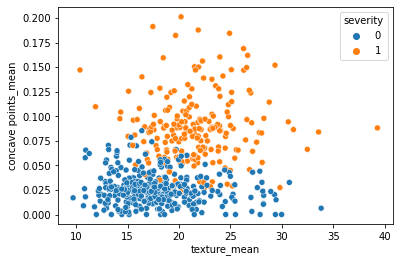

In [335]:
sns.scatterplot (x = 'texture_mean', y = 'concave points_mean', hue = 'severity', data = breastcancer)

In [336]:
breastcancer[['texture_mean','concave points_mean']].isnull().sum()

texture_mean           0
concave points_mean    0
dtype: int64

Karena tidak ada data yang hilang maka kita bisa melanjutkan step berikutnya

__Data Splitting__

In [337]:
from sklearn.model_selection import train_test_split

In [338]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 2020
)

__Scaling__

In [339]:
from sklearn.preprocessing import MinMaxScaler

In [340]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

__KNN Without Scaling__

In [341]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [342]:
knn = KNeighborsClassifier(n_neighbors = 3) # Define Model
knn.fit(x_train, y_train) # Training Model

KNeighborsClassifier(n_neighbors=3)

In [343]:
y_pred_class = knn.predict(x_test)

In [344]:
accuracy_score(y_test, y_pred_class)

print('Nilai akurasinya adalah :',accuracy_score(y_test, y_pred_class)*100,'%')

Nilai akurasinya adalah : 73.68421052631578 %


__KNN With Scaling__

In [345]:
knn_scaled = KNeighborsClassifier(n_neighbors = 3)
knn_scaled.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [346]:
y_pred_class_scaled = knn_scaled.predict(x_test_scaled)

print ('Nilai akurasinya adalah',accuracy_score(y_test, y_pred_class_scaled)* 100,'%')

Nilai akurasinya adalah 89.47368421052632 %


__3. Decision Tree__

In [347]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [348]:
tree = DecisionTreeClassifier(
    max_depth = 2,
    criterion = 'entropy'
)

In [349]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [350]:
y_pred_class = tree.predict(x_test)

In [351]:
print('Nilai akurasinya adalah :',accuracy_score(y_test, y_pred_class) * 100,'%')

Nilai akurasinya adalah : 87.71929824561403 %


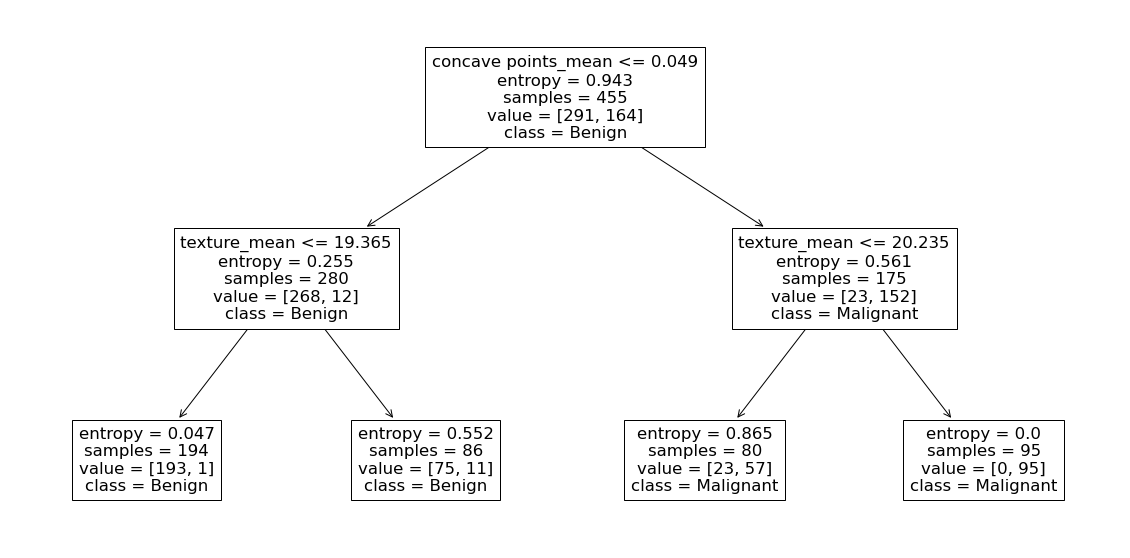

In [352]:
plt.figure(figsize = (20,10))
plot_tree(tree, feature_names = list(x), class_names = ['Benign','Malignant'])
plt.show()

Rules dari model tree tanpa scaling :

1. Jika Concave Points Mean <= 0.049 --> Texture Mean <= 19.365 --> Benign
2. Jika Concave Points Mean <= 0.049 --> Texture Mean > 19.365 --> Benign
3. Jika Concave Points Mean > 0.049 --> Texture Mean <= 20.235 --> Malignant
4. Jika Concave Points Mean > 0.049 --> Texture Mean > 20.235 --> Malignant